a. Genere en Excel y cargue en SIMIO, 100 realizaciones de la variable tiempo de arribos, por el método de transformada inversa.

In [3]:
import numpy as np
import pandas as pd

# Parámetros
n = 100  # Número de realizaciones
a = 30  # Parámetro de la distribución

# Generar números uniformes en [0, 1]
u = np.random.uniform(0, 1, n)

# Aplicar la función inversa para obtener los tiempos entre arribos
tiempos_entre_arribos = -np.log(1 - u) / a

# Calcular los tiempos de arribo acumulados
tiempos_de_arribo = np.cumsum(tiempos_entre_arribos)

# Crear DataFrame con los tiempos entre arribos y tiempos de arribo
df = pd.DataFrame({
    'Tiempo entre arribos': tiempos_entre_arribos,
    'Tiempo de arribo': tiempos_de_arribo
})

# Exportar a un archivo Excel
df.to_excel('tiempos_arribo.xlsx', index=False)

print(len(df))
df.head()



100


,Tiempo entre arribos,Tiempo de arribo
0,0.006312,0.006312
1,0.002265,0.008577
2,0.028637,0.037213
3,0.010579,0.047792
4,0.012780,0.060572


b. Genere en Excel y cargue en SIMIO, 100 realizaciones de la variable tiempo de uso de La Gran Rampa, por el método de aceptación y rechazo cuya función techo en constante y maximiza la probabilidad general de aceptación.

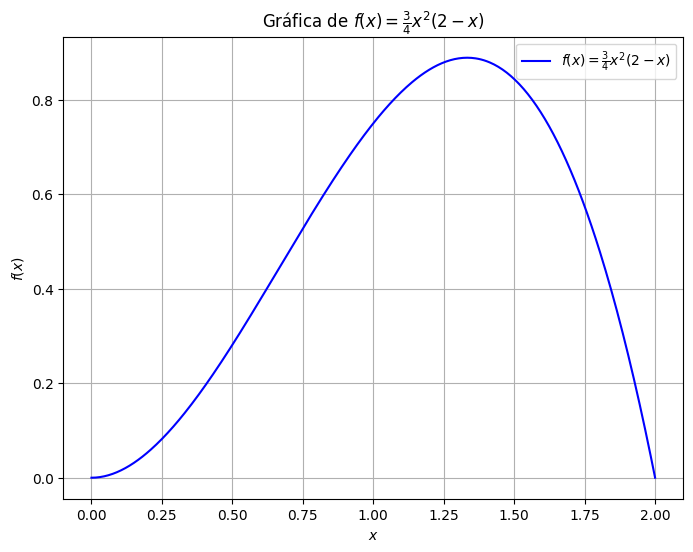

In [7]:
# Grafica PDF
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return (3 / 4) * x**2 * (2 - x)
# Crear un rango de valores de x
x = np.linspace(0, 2, 400)
# Calcular los valores de y
y = f(x)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$f(x) = \\frac{3}{4} x^2 (2 - x)$', color='blue')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gráfica de $f(x) = \\frac{3}{4} x^2 (2 - x)$')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Generar valores aletarios usando método de aceptación y rechazo
import numpy as np
import pandas as pd

# Definir la función de densidad de probabilidad f(x)
def f(x):
    return (3/4) * x**2 * (2 - x)

# Función de cobertura t(x) -> Usando la derivada se obtiene un valor de 0.888. Sin embargo para simplificar calculos se aproxima a 1.
def t(x):
    return 0.9

# Generar una muestra utilizando el método de aceptación y rechazo
def acceptance_rejection(target_samples):
    samples = []
    
    while len(samples) < target_samples:
        # Generar u_r uniforme en [0, 1]
        u_r = np.random.uniform(0, 1)
        # Generar x usando la inversa de F_r(x)
        x = 2 * u_r
        
        if x < 0 or x > 2:
            continue  # Solo considerar x dentro del intervalo [0, 2]
        
        # Evaluar la probabilidad de aceptación
        prob_accept = f(x) / t(x)
        
        # Generar una probabilidad aleatoria para decidir aceptación
        u = np.random.uniform(0, 1)
        
        if u <= prob_accept:
            samples.append(x)
    
    return np.array(samples)

# Número de muestras deseadas
target_samples = 100
samples = acceptance_rejection(target_samples)

# Convertir los valores de samples a un DataFrame
df = pd.DataFrame(samples, columns=['Sample'])

# Exportar el DataFrame a un archivo Excel
df.to_excel('samples_aceptacio_y_rechazo.xlsx', index=False)

print(len(df))
df.head()


100


,Sample
0,0.741927
1,0.991014
2,1.401548
3,0.386778
4,0.773171
